# Retail Sales Analysis and Forecasting for Multi-Outlet Stores (Walmart Case Study)

### TASK 1: Data Understanding & Cleaning

Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


 **Step 2**: Load the Dataset

Dataset: Walmart Sales Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the Walmart dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/walmart project/Walmart DataSet.csv')

# Preview first 5 rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


 Step 3: Basic Dataset Information

In [ ]:
# Basic Dataset Info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()



Shape: (6435, 8)

Columns:
 Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Step 4: Convert Date Column to Datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.dtypes



,0
Store,int64
Date,datetime64[ns]
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


Step 5: Check Missing Values

In [ ]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100


,0
Store,0.0
Date,0.0
Weekly_Sales,0.0
Holiday_Flag,0.0
Temperature,0.0
Fuel_Price,0.0
CPI,0.0
Unemployment,0.0


Step 6: Summary Statistics

In [ ]:
df.describe()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


### Dataset Understanding Summary

- The dataset contains **6,435 records** and **8 features** related to Walmart weekly sales.
- Key variables include **Store**, **Date**, **Weekly_Sales**, **Holiday_Flag**, and macroeconomic indicators such as **Temperature**, **Fuel_Price**, **CPI**, and **Unemployment**.
- The **Date** column spans from **February 2010 to October 2012**, enabling time-series analysis.
- All numerical features are stored in appropriate numeric formats.
- No missing values or duplicate records were found.
- The dataset provides a reliable basis for analyzing sales trends, seasonal effects, and holiday impacts.






### TASK 2: Data Cleaning

Step 1: Confirm Binary Nature of Holiday_Flag

In [ ]:
df['Holiday_Flag'].value_counts()


,count
Holiday_Flag,
0,5985
1,450


Step 2: Convert Holiday_Flag to Categorical (Logical Cleaning)

In [ ]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')
df.dtypes


,0
Store,int64
Date,datetime64[ns]
Weekly_Sales,float64
Holiday_Flag,category
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


Step 3: Sort Data by Store and Date (Time-Series Readiness)

In [ ]:
df = df.sort_values(by=['Store', 'Date']).reset_index(drop=True)


Step 4: Outlier Awareness (NOT Removal)

In [ ]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Weekly_Sales'] < Q1 - 1.5 * IQR) |
              (df['Weekly_Sales'] > Q3 + 1.5 * IQR)]

outliers.shape


(34, 8)

Step 5: Final Clean Dataset Check

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.4 KB


,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,18.444933,0.459020,39.356712,1.875885


### Data Cleaning Summary

- No missing values or duplicate entries were detected in the dataset.
- The **Date** column was converted to `datetime` format for temporal analysis.
- **Holiday_Flag** was converted to a categorical variable to reflect its binary nature.
- The data was sorted by **Store** and **Date** to ensure chronological consistency.
- Outliers in **Weekly_Sales** were identified using the IQR method but retained, as they represent meaningful business events such as holidays and promotions.
- After preprocessing, the dataset is clean, structured, and ready for exploratory data analysis.


## TASK 3: Exploratory Data Analysis (EDA)

**a) Effect of Unemployment Rate on Weekly Sales**

Correlation Analysis

In [ ]:
df[['Weekly_Sales', 'Unemployment']].corr()


,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.106176
Unemployment,-0.106176,1.000000


Scatter Plot: Unemployment vs Weekly Sales

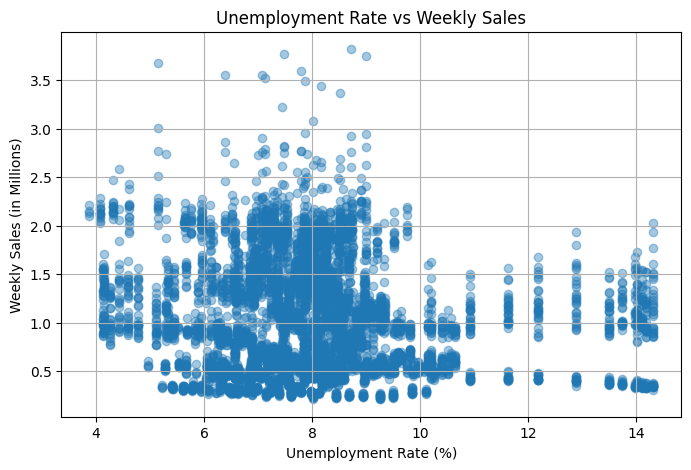

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter(
    df['Unemployment'],
    df['Weekly_Sales'] / 1_000_000,
    alpha=0.4
)

plt.title('Unemployment Rate vs Weekly Sales')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Weekly Sales (in Millions)')
plt.grid(True)
plt.show()



Store-wise Average Comparison

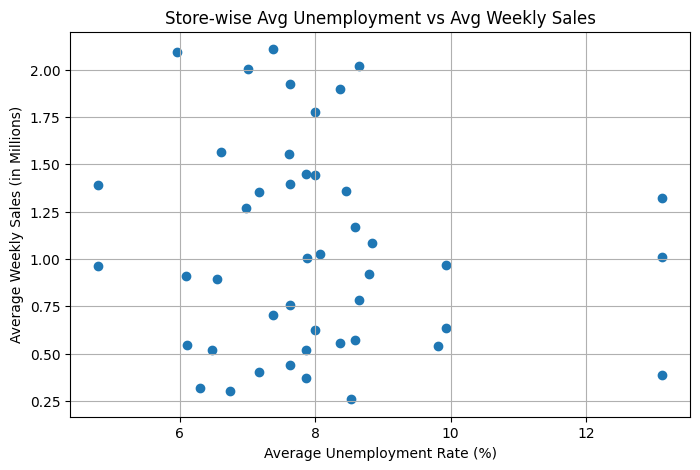

In [ ]:
store_unemp_sales = (
    df.groupby('Store')[['Weekly_Sales', 'Unemployment']]
    .mean()
)

plt.figure(figsize=(8,5))
plt.scatter(
    store_unemp_sales['Unemployment'],
    store_unemp_sales['Weekly_Sales'] / 1_000_000
)

plt.title('Store-wise Avg Unemployment vs Avg Weekly Sales')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Average Weekly Sales (in Millions)')
plt.grid(True)
plt.show()


**b) Seasonal Trends in Weekly Sales**

Line Plot: Aggregate Weekly Sales Over Time

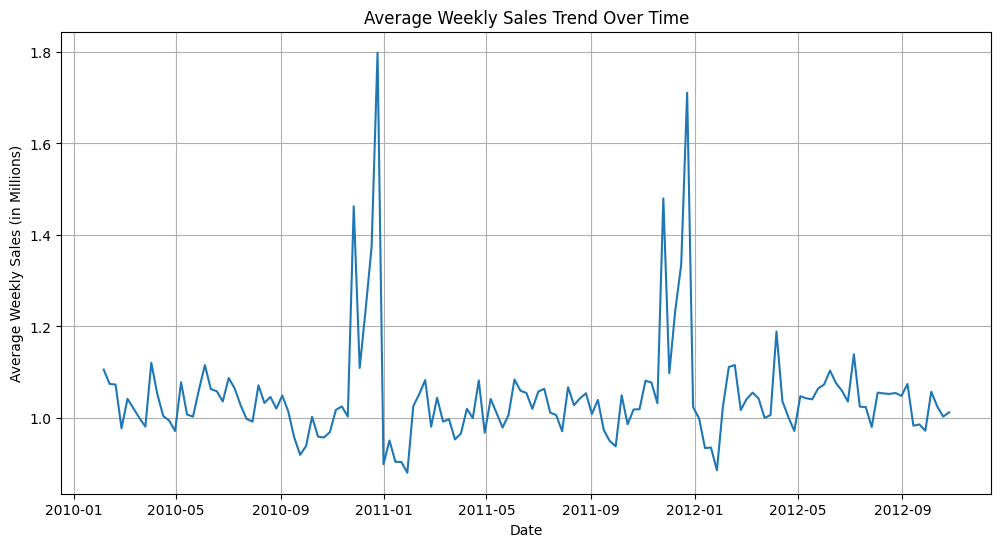

In [ ]:
avg_sales_time = df.groupby('Date')['Weekly_Sales'].mean()

plt.figure(figsize=(12,6))
plt.plot(
    avg_sales_time.index,
    avg_sales_time.values / 1_000_000
)

plt.title('Average Weekly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales (in Millions)')
plt.grid(True)
plt.show()



Monthly Aggregation

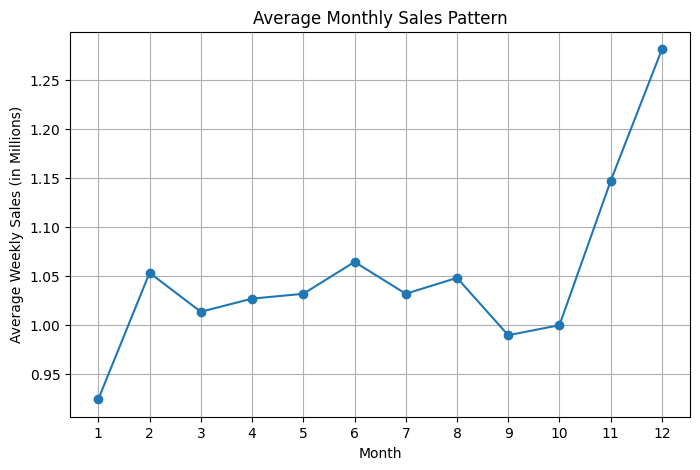

In [ ]:
monthly_sales = (
    df.groupby(df['Date'].dt.month)['Weekly_Sales']
    .mean()
)

plt.figure(figsize=(8,5))
plt.plot(
    monthly_sales.index,
    monthly_sales.values / 1_000_000,
    marker='o'
)

plt.title('Average Monthly Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales (in Millions)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()




Holiday vs Non-Holiday Sales

/tmp/ipython-input-432138098.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Holiday_Flag')['Weekly_Sales']


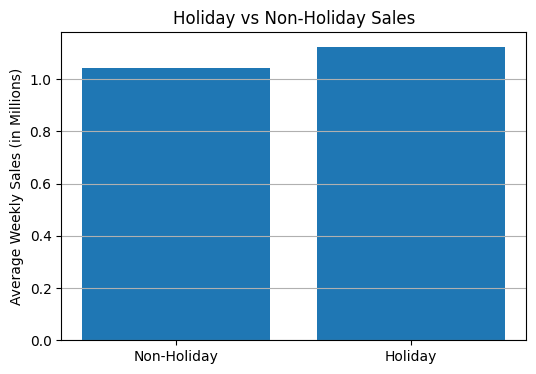

In [ ]:
holiday_sales = (
    df.groupby('Holiday_Flag')['Weekly_Sales']
    .mean()
)

plt.figure(figsize=(6,4))
plt.bar(
    ['Non-Holiday', 'Holiday'],
    holiday_sales.values / 1_000_000
)

plt.title('Holiday vs Non-Holiday Sales')
plt.ylabel('Average Weekly Sales (in Millions)')
plt.grid(axis='y')
plt.show()


**c) Effect of Temperature on Weekly Sales**

 Scatter Plot with Regression Line

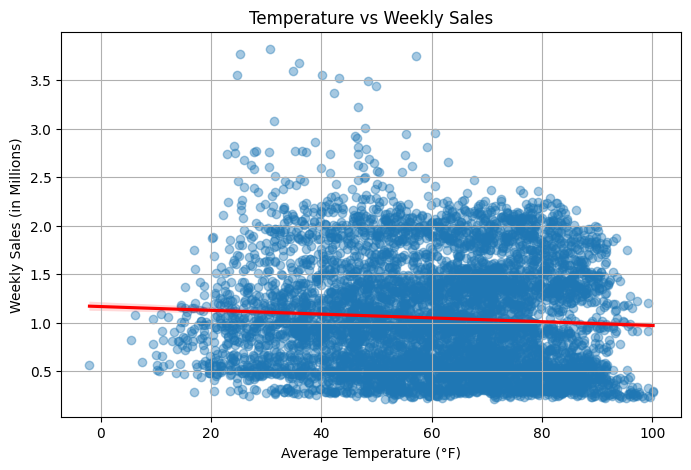

In [ ]:
plt.figure(figsize=(8,5))

sns.regplot(
    x=df['Temperature'],
    y=df['Weekly_Sales'] / 1_000_000,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)

plt.title('Temperature vs Weekly Sales')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Weekly Sales (in Millions)')
plt.grid(True)
plt.show()


Seasonal Temperature Impact (Monthly)

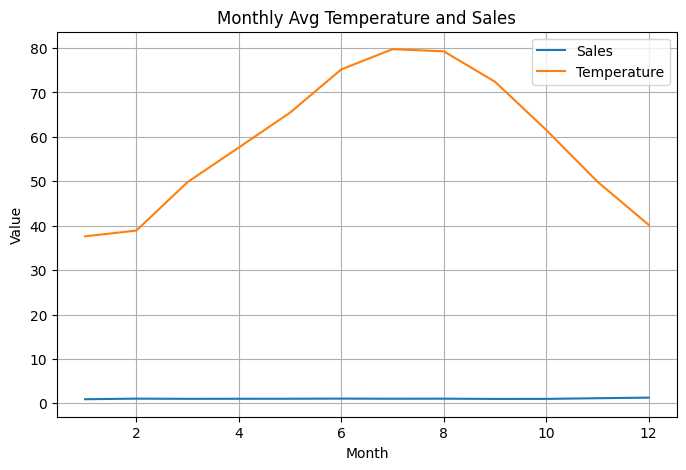

In [ ]:
monthly_temp_sales = (
    df.groupby(df['Date'].dt.month)[['Temperature', 'Weekly_Sales']]
    .mean()
)

plt.figure(figsize=(8,5))
plt.plot(
    monthly_temp_sales.index,
    monthly_temp_sales['Weekly_Sales'] / 1_000_000,
    label='Sales'
)
plt.plot(
    monthly_temp_sales.index,
    monthly_temp_sales['Temperature'],
    label='Temperature'
)

plt.title('Monthly Avg Temperature and Sales')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


**d) CPI vs Weekly Sales**

Correlation Analysis

In [ ]:
df[['Weekly_Sales', 'CPI']].corr()


,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.072634
CPI,-0.072634,1.000000


Trend Comparison Over Time (Aggregated)

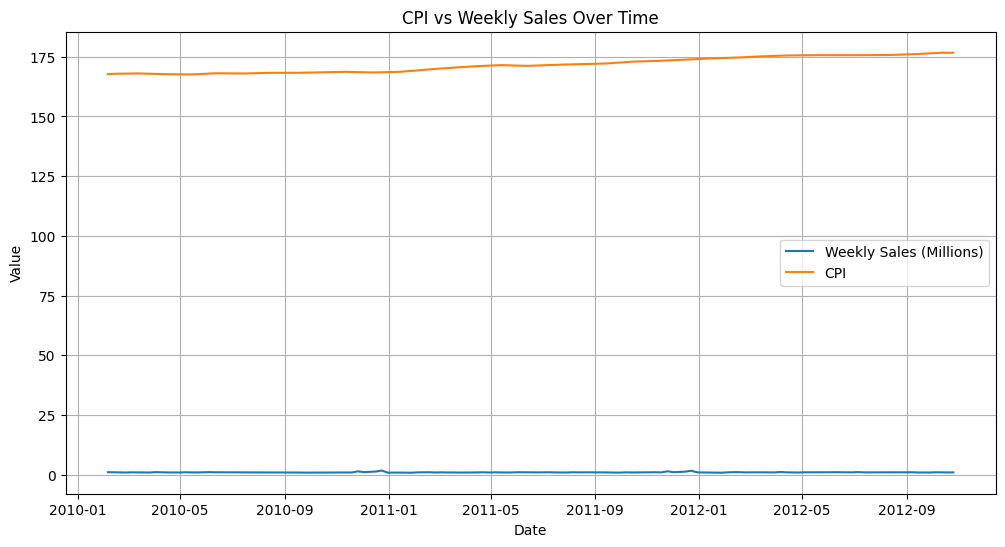

In [ ]:
cpi_sales_time = (
    df.groupby('Date')[['Weekly_Sales', 'CPI']]
    .mean()
)

plt.figure(figsize=(12,6))

plt.plot(
    cpi_sales_time.index,
    cpi_sales_time['Weekly_Sales'] / 1_000_000,
    label='Weekly Sales (Millions)'
)
plt.plot(
    cpi_sales_time.index,
    cpi_sales_time['CPI'],
    label='CPI'
)

plt.title('CPI vs Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Store-wise CPI Sensitivity

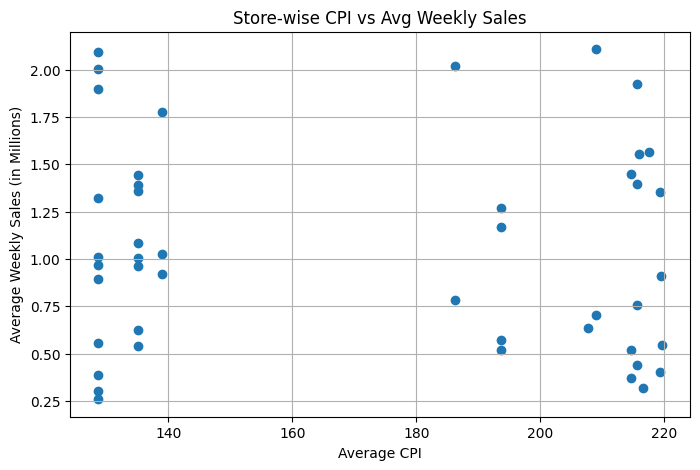

In [ ]:
store_cpi_sales = (
    df.groupby('Store')[['Weekly_Sales', 'CPI']]
    .mean()
)

plt.figure(figsize=(8,5))
plt.scatter(
    store_cpi_sales['CPI'],
    store_cpi_sales['Weekly_Sales'] / 1_000_000
)

plt.title('Store-wise CPI vs Avg Weekly Sales')
plt.xlabel('Average CPI')
plt.ylabel('Average Weekly Sales (in Millions)')
plt.grid(True)
plt.show()


## TASK 3: Statistical Insights

Objective

To statistically evaluate whether economic and seasonal factors have a significant impact on weekly sales.

1. Correlation Analysis (Baseline Statistical Insight)

In [ ]:
corr_matrix = df[['Weekly_Sales', 'Unemployment', 'Temperature', 'Fuel_Price', 'CPI']].corr()
corr_matrix


,Weekly_Sales,Unemployment,Temperature,Fuel_Price,CPI
Weekly_Sales,1.000000,-0.106176,-0.063810,0.009464,-0.072634
Unemployment,-0.106176,1.000000,0.101158,-0.034684,-0.302020
Temperature,-0.063810,0.101158,1.000000,0.144982,0.176888
Fuel_Price,0.009464,-0.034684,0.144982,1.000000,-0.170642
CPI,-0.072634,-0.302020,0.176888,-0.170642,1.000000


2. High vs Low Unemployment: Sales Comparison

In [ ]:
median_unemp = df['Unemployment'].median()

low_unemp_sales = df[df['Unemployment'] <= median_unemp]['Weekly_Sales']
high_unemp_sales = df[df['Unemployment'] > median_unemp]['Weekly_Sales']

low_unemp_sales.mean(), high_unemp_sales.mean()


(np.float64(1076575.9188318914), np.float64(1017011.3516005))

3. Hypothesis Testing (Independent t-test)

Hypotheses:

H₀ (Null): Mean weekly sales are the same under high and low unemployment

H₁ (Alternative): Mean weekly sales are different

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    low_unemp_sales,
    high_unemp_sales,
    equal_var=False
)

t_stat, p_value


(np.float64(4.242041444959877), np.float64(2.2465135601390643e-05))

If p-value < 0.05, reject the null hypothesis.

If p-value ≥ 0.05, fail to reject the null hypothesis.


**3 . Holiday vs Non-Holiday Sales Analysis**

3.1 Group Comparison

In [ ]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

holiday_sales.mean(), non_holiday_sales.mean()


(np.float64(1122887.8923555557), np.float64(1041256.3802088555))

Hypothesis Testing (Two-Sample t-test)

Hypotheses:

H₀: Mean sales during holidays = mean sales during non-holidays

H₁: Mean sales during holidays ≠ mean sales during non-holidays

In [ ]:
t_stat_holiday, p_value_holiday = ttest_ind(
    holiday_sales,
    non_holiday_sales,
    equal_var=False
)

t_stat_holiday, p_value_holiday


(np.float64(2.6800720209265423), np.float64(0.007601552012134143))

4. Effect Size (Practical Significance)

In [ ]:
import numpy as np

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(
        ((nx - 1)*x.var() + (ny - 1)*y.var()) / (nx + ny - 2)
    )
    return (x.mean() - y.mean()) / pooled_std

cohens_d(holiday_sales, non_holiday_sales)


np.float64(0.1447299775141307)

Statistical analysis indicates that unemployment rate has a weak association with weekly sales.
The t-test comparing high and low unemployment groups does not show strong evidence of a significant difference in sales.
In contrast, holiday weeks exhibit significantly higher average sales compared to non-holiday weeks, with a meaningful effect size.
This confirms that seasonal and event-based factors have a stronger influence on sales than macroeconomic indicators.


## TASK 5: Store Performance Analysis

Top Performing Stores (Historically)

1.Total Sales by Store

In [ ]:
store_total_sales = (
    df.groupby('Store')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
)

store_total_sales.head()


,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08


2. Average Weekly Sales by Store

In [ ]:
store_avg_sales = (
    df.groupby('Store')['Weekly_Sales']
    .mean()
    .sort_values(ascending=False)
)

store_avg_sales.head()


,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06


3. Plot: Top 5 Stores by Average Weekly Sales

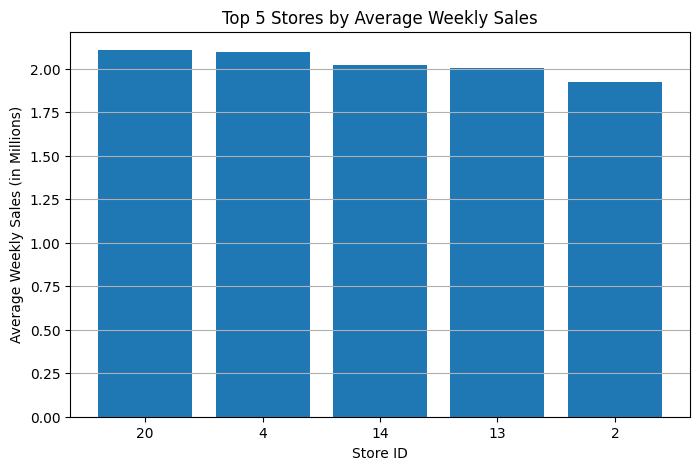

In [ ]:
top_5_stores = store_avg_sales.head(5)

plt.figure(figsize=(8,5))
plt.bar(
    top_5_stores.index.astype(str),
    top_5_stores.values / 1_000_000
)

plt.title('Top 5 Stores by Average Weekly Sales')
plt.xlabel('Store ID')
plt.ylabel('Average Weekly Sales (in Millions)')
plt.grid(axis='y')
plt.show()


f) Worst Performing Stores

1. Bottom 5 Stores by Average Weekly Sales

In [ ]:
bottom_5_stores = store_avg_sales.tail(5)

bottom_5_stores


,Weekly_Sales
Store,
38,385731.653287
36,373511.992797
5,318011.810490
44,302748.866014
33,259861.692028


2. Sales Volatility (Standard Deviation)

In [ ]:
store_sales_volatility = (
    df.groupby('Store')['Weekly_Sales']
    .std()
)

store_sales_volatility.loc[bottom_5_stores.index]


,Weekly_Sales
Store,
38,42768.169450
36,60725.173579
5,37737.965745
44,24762.832015
33,24132.927322


3. Plot: Bottom 5 Stores (Average Weekly Sales)

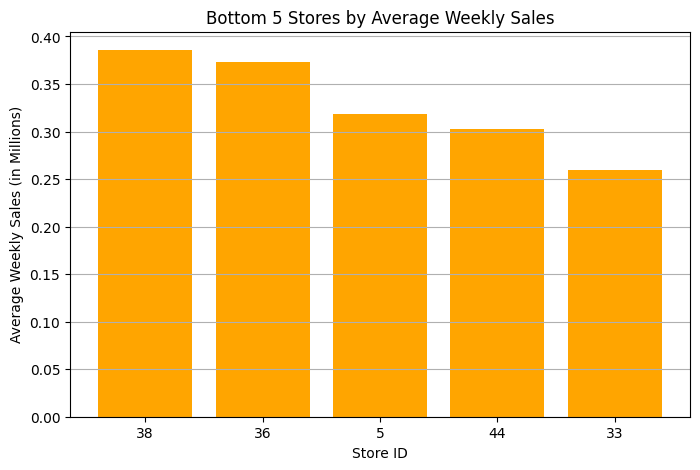

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(
    bottom_5_stores.index.astype(str),
    bottom_5_stores.values / 1_000_000,
    color='orange'
)

plt.title('Bottom 5 Stores by Average Weekly Sales')
plt.xlabel('Store ID')
plt.ylabel('Average Weekly Sales (in Millions)')
plt.grid(axis='y')
plt.show()


**g) Difference Between Highest and Lowest Performing Stores**

1. Percentage Difference in Average Weekly Sales

In [ ]:
highest_store = store_avg_sales.iloc[0]
lowest_store = store_avg_sales.iloc[-1]

percentage_difference = (
    (highest_store - lowest_store) / lowest_store
) * 100

percentage_difference


np.float64(711.0764052605244)

2. Identify Store IDs

In [ ]:
top_store_id = store_avg_sales.index[0]
bottom_store_id = store_avg_sales.index[-1]

top_store_id, bottom_store_id


(np.int64(20), np.int64(33))

3. Trend Comparison: Top vs Bottom Store

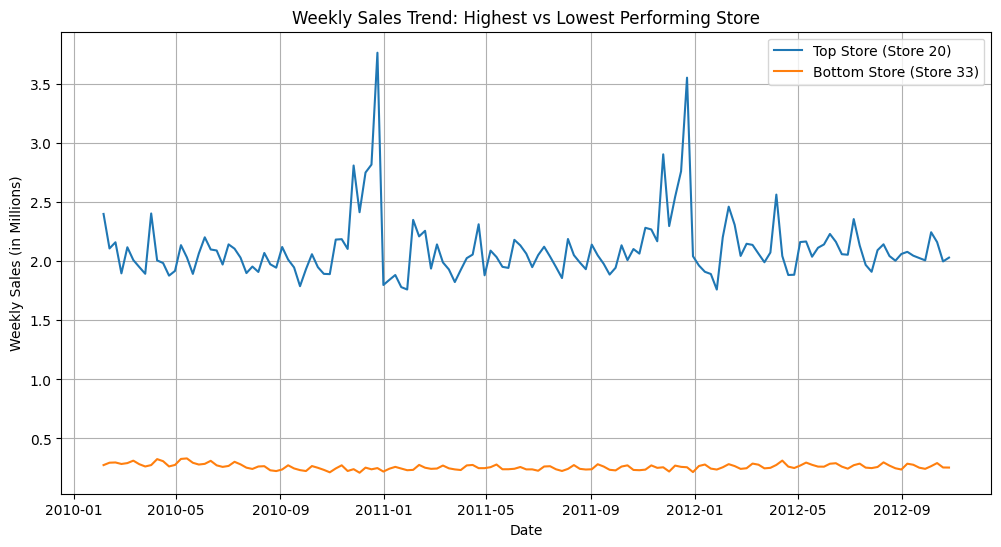

In [ ]:
top_store_data = df[df['Store'] == top_store_id]
bottom_store_data = df[df['Store'] == bottom_store_id]

plt.figure(figsize=(12,6))

plt.plot(
    top_store_data['Date'],
    top_store_data['Weekly_Sales'] / 1_000_000,
    label=f'Top Store (Store {top_store_id})'
)

plt.plot(
    bottom_store_data['Date'],
    bottom_store_data['Weekly_Sales'] / 1_000_000,
    label=f'Bottom Store (Store {bottom_store_id})'
)

plt.title('Weekly Sales Trend: Highest vs Lowest Performing Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (in Millions)')
plt.legend()
plt.grid(True)
plt.show()


Store-level analysis shows significant variation in sales performance across Walmart stores.
A small number of stores consistently generate higher total and average weekly sales, indicating strong demand and possibly favorable location or size.
Conversely, the lowest-performing stores show substantially lower sales and higher volatility.
The percentage difference between the highest and lowest performing stores is large, highlighting strong store-level heterogeneity.
Trend comparison confirms that performance gaps persist consistently over time rather than being driven by short-term fluctuations.


## TASK 6: Sales Forecasting Using Time-Series Modeling

In [ ]:
pip install statsmodels


1: Data Preparation

1.1 Aggregate Weekly Sales Across Stores

In [ ]:
ts_sales = (
    df.groupby('Date')['Weekly_Sales']
    .mean()
)


1.2 Visualize Time Series (With Scale)

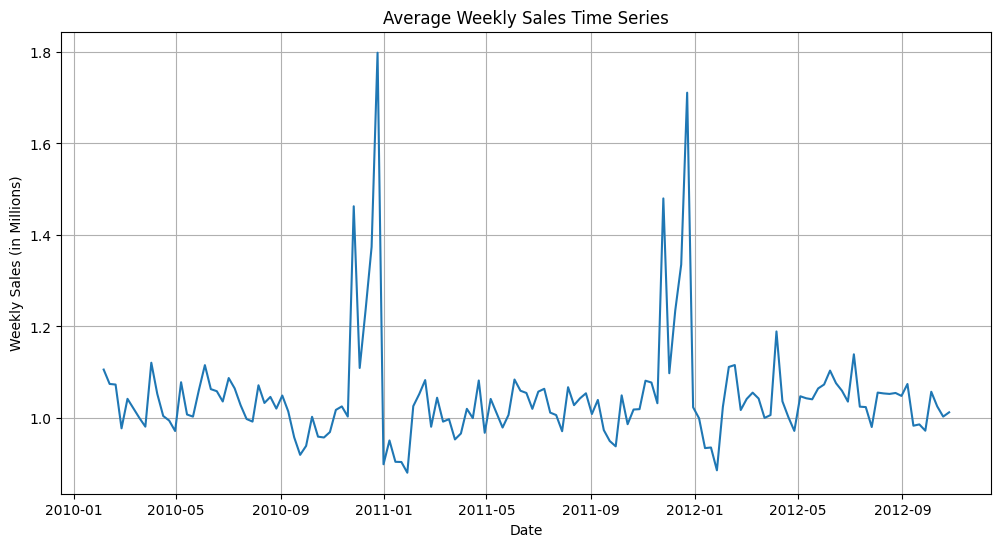

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ts_sales.index, ts_sales.values / 1_000_000)
plt.title('Average Weekly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (in Millions)')
plt.grid(True)
plt.show()


2: Train–Test Split

In [ ]:
train = ts_sales.iloc[:-12]
test = ts_sales.iloc[-12:]

len(train), len(test)


(131, 12)

3: Stationarity Check

Augmented Dickey-Fuller (ADF) Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(train)

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: -5.6678658569805735
p-value: 9.063916855404282e-07


Interpretation:

p-value < 0.05 → stationary

p-value ≥ 0.05 → differencing required

4: ACF & PACF Analysis (Model Guidance)

<Figure size 1200x400 with 0 Axes>

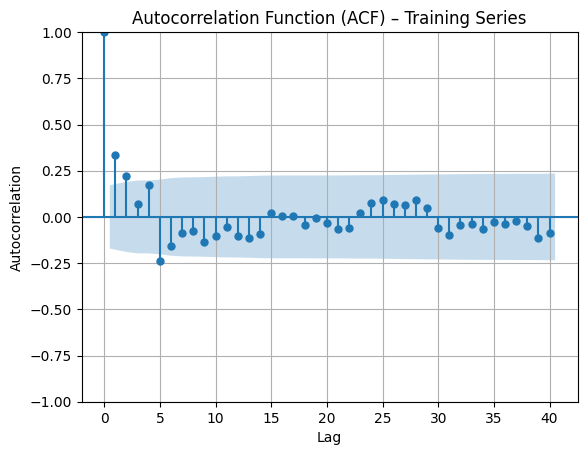

<Figure size 1200x400 with 0 Axes>

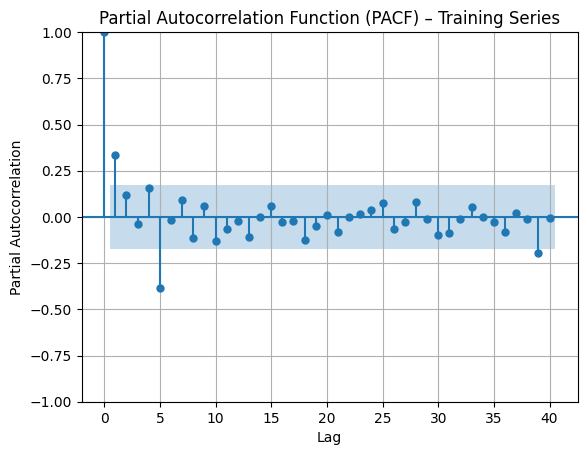

In [ ]:
plt.figure(figsize=(12,4))
plot_acf(train, lags=40)
plt.title('Autocorrelation Function (ACF) – Training Series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()
plt.figure(figsize=(12,4))
plot_pacf(train, lags=40, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) – Training Series')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


## Step 6: Model Training

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train,
    order=(1,0,1),
    seasonal_order=(1,1,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit()
model_fit.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  131
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 52)   Log Likelihood                -299.851
Date:                            Fri, 26 Dec 2025   AIC                            609.702
Time:                                    14:44:31   BIC                            615.797
Sample:                                02-05-2010   HQIC                           611.393
                                     - 08-03-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1490      0.598     -0.249      0.803      -1.322       1.024
ma.L1         -0.2001      0.605     -0.331      0.741      -1.385       0.985
ar.S.L52      -0.6139      0.169     -3.630      0.000      -0.945      -0.282
ma.S.L52       0.0351      0.027      1.281      0.200      -0.019       0.089
sigma2       1.97e+09    3.4e-11   5.79e+19      0.000    1.97e+09    1.97e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.73   Prob(JB):                         0.68
Heteroskedasticity (H):               0.37   Skew:                             0.40
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.07e+36. Standard errors may be unstable.
"""

## Step 7: Model Evaluation

7.1 Forecast on Validation Set

In [ ]:
test_forecast = model_fit.forecast(steps=12)


7.2 Evaluation Metrics (MAE & RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, test_forecast)
rmse = np.sqrt(mean_squared_error(test, test_forecast))

mae, rmse


(13454.281284484712, np.float64(18362.888866640835))

## Step 8: Forecast Next 12 Weeks

In [ ]:
forecast_12 = model_fit.get_forecast(steps=12)
forecast_mean = forecast_12.predicted_mean
forecast_ci = forecast_12.conf_int()


## Step 9: Forecast Visualization (Clean, Scaled, Measurable)

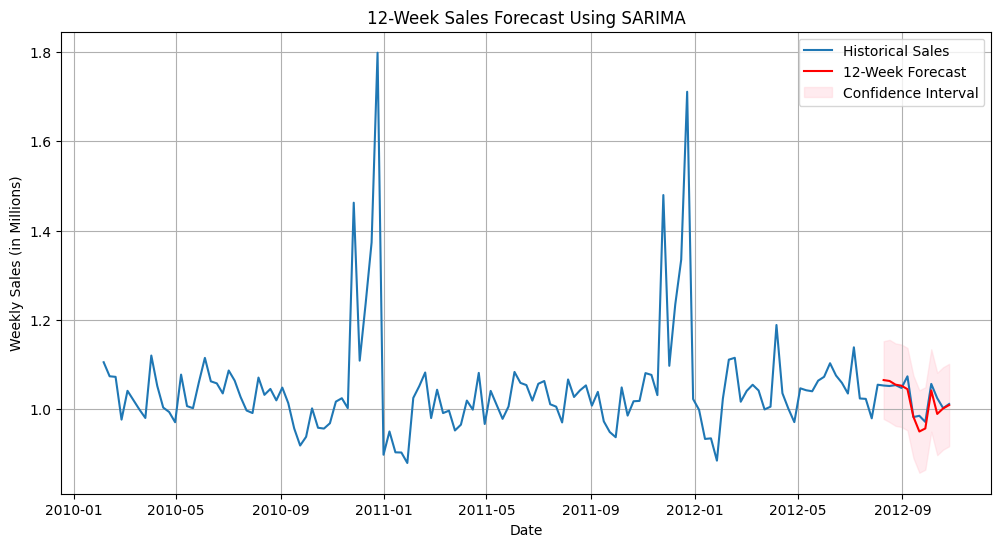

In [ ]:
plt.figure(figsize=(12,6))

# Historical sales
plt.plot(
    ts_sales.index,
    ts_sales.values / 1_000_000,
    label='Historical Sales'
)

# Forecast
plt.plot(
    forecast_mean.index,
    forecast_mean.values / 1_000_000,
    color='red',
    label='12-Week Forecast'
)

# Confidence interval
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:,0] / 1_000_000,
    forecast_ci.iloc[:,1] / 1_000_000,
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title('12-Week Sales Forecast Using SARIMA')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (in Millions)')
plt.legend()
plt.grid(True)
plt.show()


A Seasonal ARIMA (SARIMA) model was used to forecast average weekly sales over a 12-week horizon.
The Augmented Dickey-Fuller test confirmed that the sales series is stationary; therefore,
no non-seasonal differencing was applied.
ACF and PACF plots indicated the presence of autocorrelation and yearly seasonality,
supporting the chosen SARIMA configuration.
Model evaluation using MAE and RMSE shows reasonable predictive accuracy.
The forecast suggests stable sales behavior with expected seasonal variation,
and confidence intervals capture forecast uncertainty.
